# Laboration deep learning

## 0. EDA och filhantering

### a)

### b)

In [2]:
from pathlib import Path
import numpy as np
import os

current_path = Path().absolute()
print(f"{current_path = }")

current_path = WindowsPath('y:/Skola/OOP/Skolarbete/AI-Erik-Johansson-OPA23/lab2')


In [3]:
import matplotlib.pyplot as plt

data_path = current_path / "original_data" / "train" / "train"

image_paths = [f for f in os.listdir(data_path)]

# https://stackoverflow.com/questions/49280966/pulling-random-files-out-of-a-folder-for-sampling

images_random = [(plt.imread(data_path / i), i) for i in (np.random.choice(image_paths, 10))]

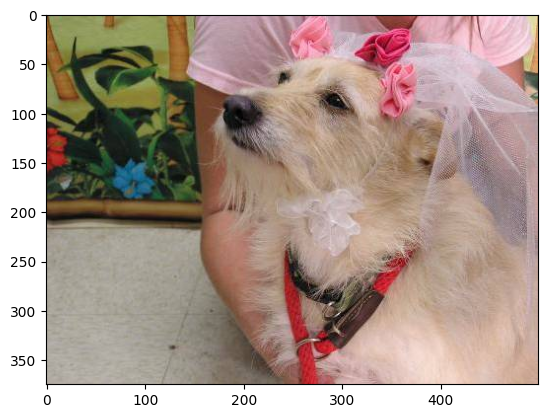

In [4]:
plt.imshow(images_random[0][0])

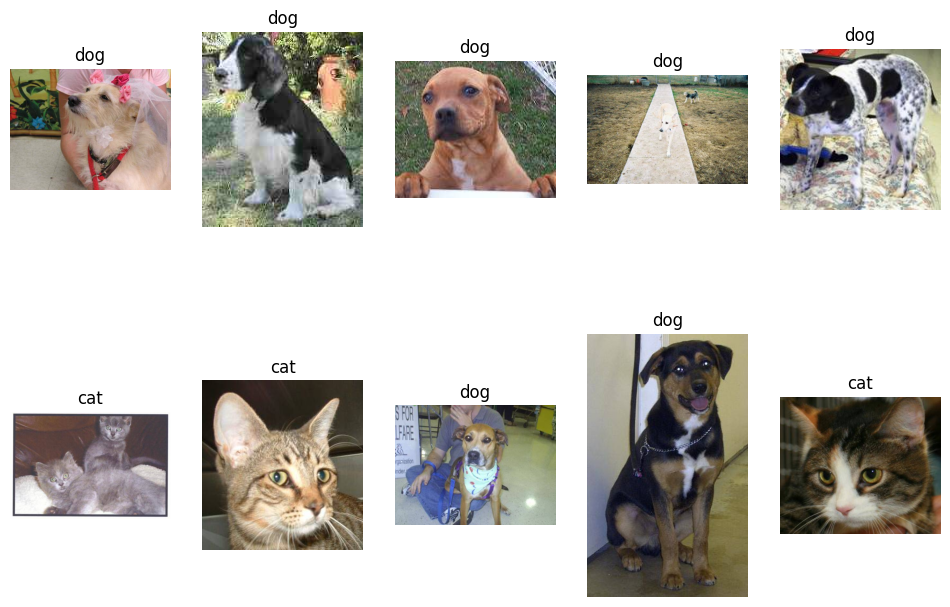

In [5]:
import matplotlib.pyplot as plt

labels = ["dog", "cat"]

fig, axes = plt.subplots(2,5, figsize=(12,8))

for ax, image in zip(axes.flatten(), images_random):
    ax.imshow(image[0])
    # https://stackoverflow.com/questions/47684802/to-check-if-filename-has-substring-of-a-word-in-a-list
    for label in labels:
        if label in image[1]:
            ax.set_title(f"{label}")
    ax.axis("off")

### c)

In [6]:
for size in ("small", "tiny"):
    newdir = current_path / f"experiment_{size}_data"
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    for split in ("test", "train", "val"):
        splitdir = newdir / split
        if not os.path.exists(splitdir):
            os.makedirs(splitdir)


### d)

In [7]:
cat_paths = [str(path) for path in data_path.glob("*.jpg")][:12500]
dog_paths = [str(path) for path in data_path.glob("*.jpg")][12500:]
cat_paths[12499], dog_paths[12499]

('y:\\Skola\\OOP\\Skolarbete\\AI-Erik-Johansson-OPA23\\lab2\\original_data\\train\\train\\cat.9999.jpg',
 'y:\\Skola\\OOP\\Skolarbete\\AI-Erik-Johansson-OPA23\\lab2\\original_data\\train\\train\\dog.9999.jpg')

In [8]:
cat_small = np.random.choice(cat_paths, 1250, replace=False)
dog_small = np.random.choice(dog_paths, 1250, replace=False)
len(cat_small), len(dog_small)

(1250, 1250)

In [9]:
len(cat_small)

1250

In [10]:
from itertools import islice
# https://www.geeksforgeeks.org/python-split-list-in-uneven-groups/
test_sizes = [250, 800, 200]

temp = iter(cat_small)
cat_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(cat_split[1])

800

In [11]:
temp = iter(dog_small)
dog_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(dog_split[2])

200

In [12]:
for cat in cat_split:
    print(len(cat))

250
800
200


In [13]:
import shutil
# https://stackoverflow.com/questions/123198/how-to-copy-files

dirs = ("test", "train", "val")
#for dir, splits in zip(dirs, cat_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)

#for dir, splits in zip(dirs, dog_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)
    

### e)

In [79]:
data_path = current_path / "experiment_small_data" / "test"
test_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.seed(42)
np.random.shuffle(test_paths)
len(test_paths)

500

In [80]:
data_path = current_path / "experiment_small_data" / "train"
train_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(train_paths)
len(train_paths)

1600

In [81]:
data_path = current_path / "experiment_small_data" / "val"
val_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(val_paths)
len(val_paths)

400

In [82]:
y_test = np.array([int("dog" in path) for path in test_paths])
y_train = np.array([int("dog" in path) for path in train_paths])
y_val = np.array([int("dog" in path) for path in val_paths])
len(y_test), len(y_train), len(y_val)

(500, 1600, 400)

In [83]:
image_test = [plt.imread(path) for path in test_paths[:10]]
image_labels = y_test[:10]
len(image_test), len(image_labels)

(10, 10)

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

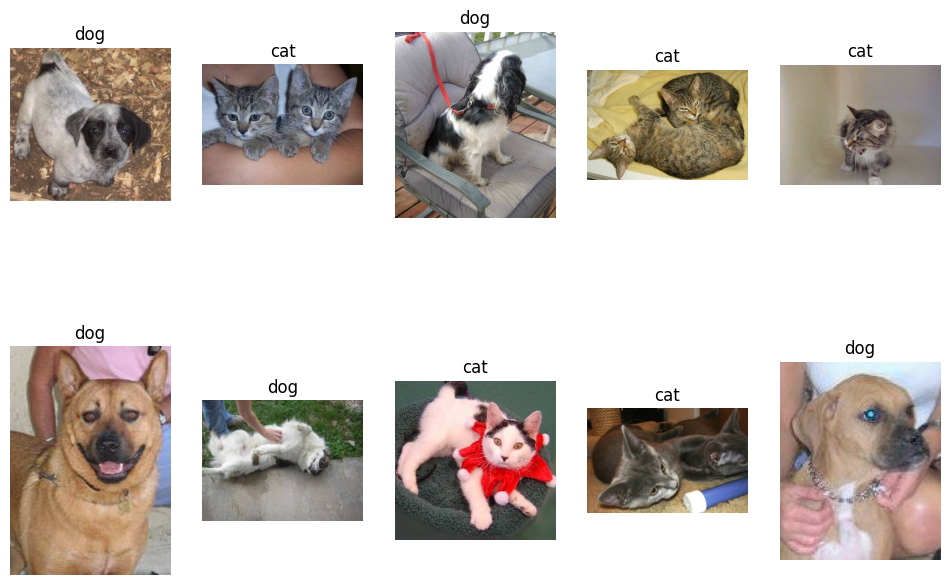

In [84]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(image_test[i])
    ax.axis("off")
    ax.set_title(labels[image_labels[i]])

fig.tight_layout

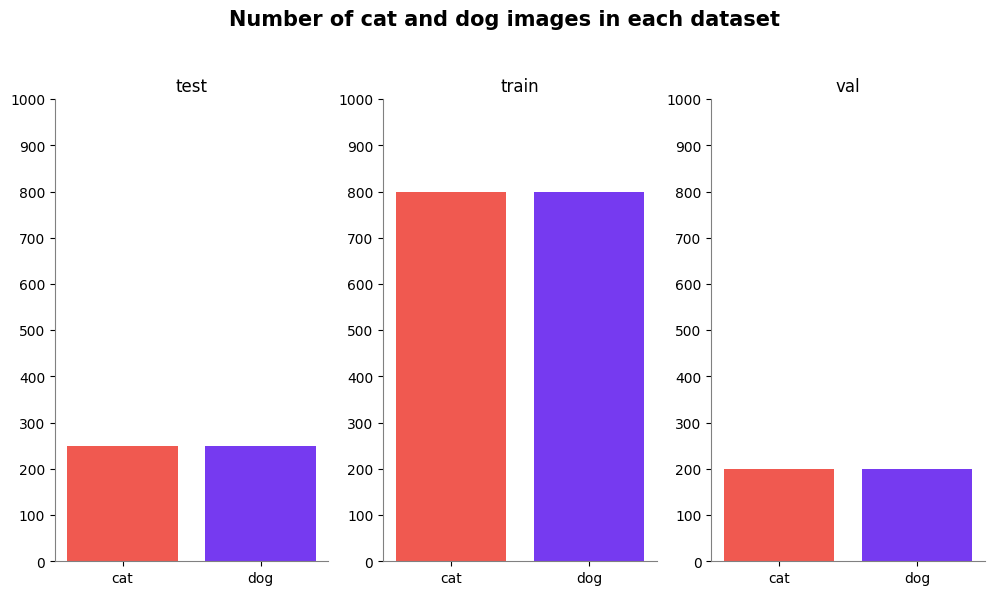

In [85]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for dir, ax in zip(dirs, axes):
    x = ["cat", "dog"]
    ax.set_title(dir)
    if dir == "test":
        y = [np.count_nonzero(y_test == i) for i in range(2)]
    elif dir == "train":
        y = [np.count_nonzero(y_train == i) for i in range(2)]
    elif dir == "val":
        y = [np.count_nonzero(y_val == i) for i in range(2)]
    ax.bar(x, y, color=["#F05950", "#763AF0"])
    ax.set_yticks(range(0, 1001, 100))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")

    fig.suptitle(
        "Number of cat and dog images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

In [86]:
y_train[:20]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

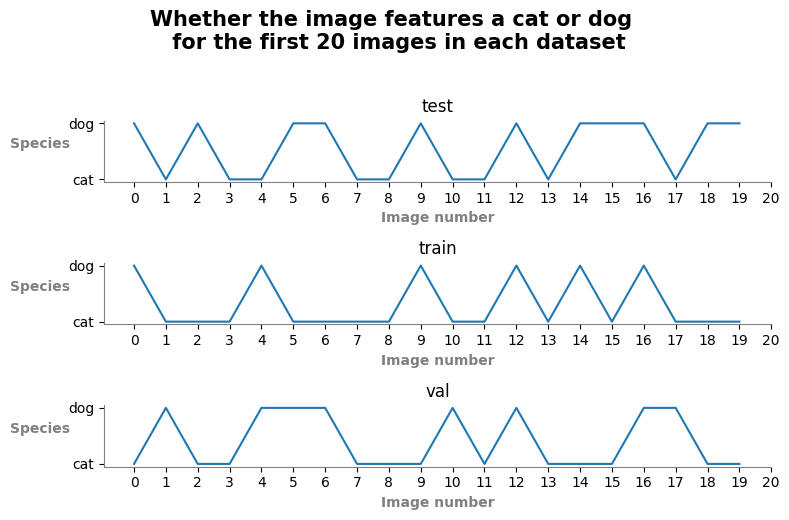

In [87]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(3, 1, figsize=(8, 5))
for dir, ax in zip(dirs, axes):
    x = range(20)
    ax.set_title(dir)
    if dir == "test":
        y = y_test[:20]
    elif dir == "train":
        y = y_train[:20]
    elif dir == "val":
        y = y_val[:20]
    ax.plot(x, y)
    ax.set_yticks(ticks=range(0, 2), labels=("cat", "dog"))
    ax.set_xticks(ticks=range(0, 21, 1))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")
    ax.set_xlabel("Image number", color="GRAY", fontweight="bold")
    ax.set_ylabel("Species", rotation=0, labelpad=20, color="GRAY", fontweight="bold")

    fig.suptitle(
        "Whether the image features a cat or dog \n for the first 20 images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

fig.tight_layout()

## 1. Bildbehandling

### a)

In [90]:
train_images = [plt.imread(path) for path in train_paths]
len(train_images)

1600

In [91]:
heights = [image.shape[0] for image in train_images]
widths = [image.shape[1] for image in train_images]
heights, widths

([371,
  253,
  443,
  256,
  375,
  378,
  493,
  499,
  254,
  210,
  253,
  499,
  276,
  335,
  333,
  195,
  354,
  332,
  457,
  429,
  499,
  499,
  499,
  449,
  434,
  370,
  107,
  339,
  371,
  328,
  119,
  374,
  401,
  298,
  427,
  374,
  447,
  239,
  252,
  400,
  200,
  375,
  375,
  288,
  351,
  269,
  375,
  374,
  375,
  499,
  392,
  500,
  374,
  350,
  112,
  499,
  400,
  371,
  499,
  375,
  190,
  299,
  300,
  499,
  497,
  334,
  299,
  374,
  453,
  374,
  500,
  499,
  359,
  374,
  479,
  393,
  374,
  446,
  500,
  191,
  500,
  424,
  338,
  374,
  500,
  226,
  332,
  373,
  499,
  495,
  499,
  397,
  332,
  234,
  309,
  374,
  360,
  356,
  375,
  374,
  375,
  375,
  386,
  435,
  458,
  383,
  240,
  336,
  425,
  301,
  500,
  299,
  375,
  224,
  374,
  255,
  262,
  261,
  374,
  417,
  500,
  375,
  203,
  416,
  180,
  332,
  300,
  355,
  499,
  500,
  374,
  375,
  370,
  449,
  359,
  189,
  269,
  123,
  359,
  500,
  199,
  193,
  426,

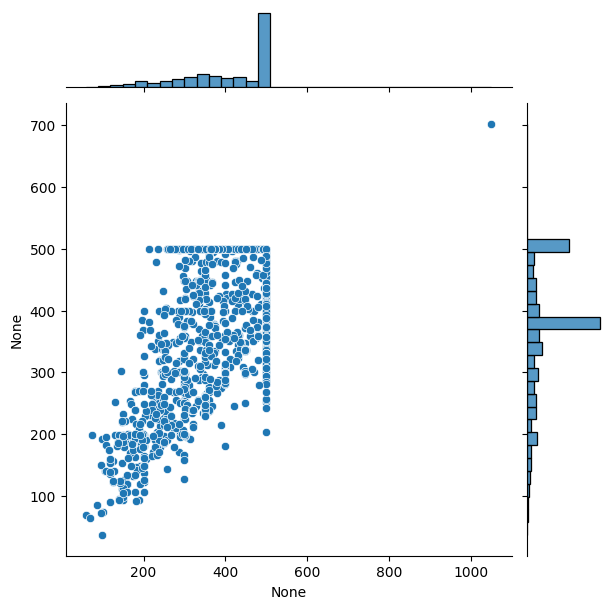

In [92]:
import seaborn as sns 

sns.jointplot(x=widths, y=heights)

In [107]:
res = []
for idx in range(0, len(heights)) :
    if heights[idx] < 100 or widths[idx] < 100:
        res.append(idx)

res

[141,
 189,
 330,
 361,
 416,
 598,
 753,
 779,
 837,
 874,
 1072,
 1092,
 1134,
 1170,
 1224,
 1286]

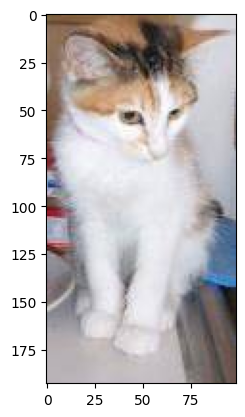

In [108]:
plt.imshow(train_images[141])

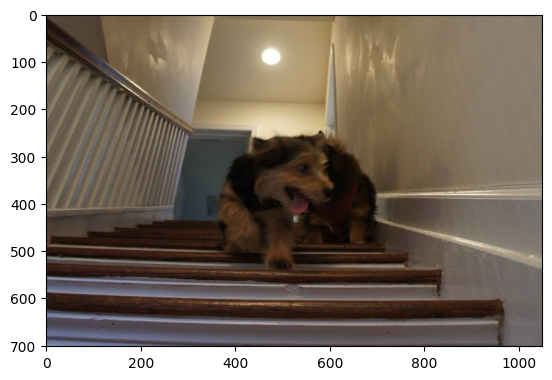

In [106]:
plt.imshow(train_images[440])

In [102]:
heights

[371,
 253,
 443,
 256,
 375,
 378,
 493,
 499,
 254,
 210,
 253,
 499,
 276,
 335,
 333,
 195,
 354,
 332,
 457,
 429,
 499,
 499,
 499,
 449,
 434,
 370,
 107,
 339,
 371,
 328,
 119,
 374,
 401,
 298,
 427,
 374,
 447,
 239,
 252,
 400,
 200,
 375,
 375,
 288,
 351,
 269,
 375,
 374,
 375,
 499,
 392,
 500,
 374,
 350,
 112,
 499,
 400,
 371,
 499,
 375,
 190,
 299,
 300,
 499,
 497,
 334,
 299,
 374,
 453,
 374,
 500,
 499,
 359,
 374,
 479,
 393,
 374,
 446,
 500,
 191,
 500,
 424,
 338,
 374,
 500,
 226,
 332,
 373,
 499,
 495,
 499,
 397,
 332,
 234,
 309,
 374,
 360,
 356,
 375,
 374,
 375,
 375,
 386,
 435,
 458,
 383,
 240,
 336,
 425,
 301,
 500,
 299,
 375,
 224,
 374,
 255,
 262,
 261,
 374,
 417,
 500,
 375,
 203,
 416,
 180,
 332,
 300,
 355,
 499,
 500,
 374,
 375,
 370,
 449,
 359,
 189,
 269,
 123,
 359,
 500,
 199,
 193,
 426,
 374,
 481,
 374,
 499,
 499,
 149,
 375,
 499,
 448,
 293,
 468,
 197,
 374,
 361,
 458,
 375,
 374,
 324,
 369,
 329,
 420,
 210,
 388,
 349